In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import joblib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [19]:
log_path = Path("../logs/2023-05-26_08-48-18/results")
df = pd.read_csv(log_path / "result.csv")

conv_matrix, ips_matrix, random_matrix = joblib.load(log_path / "log_data.pkl")

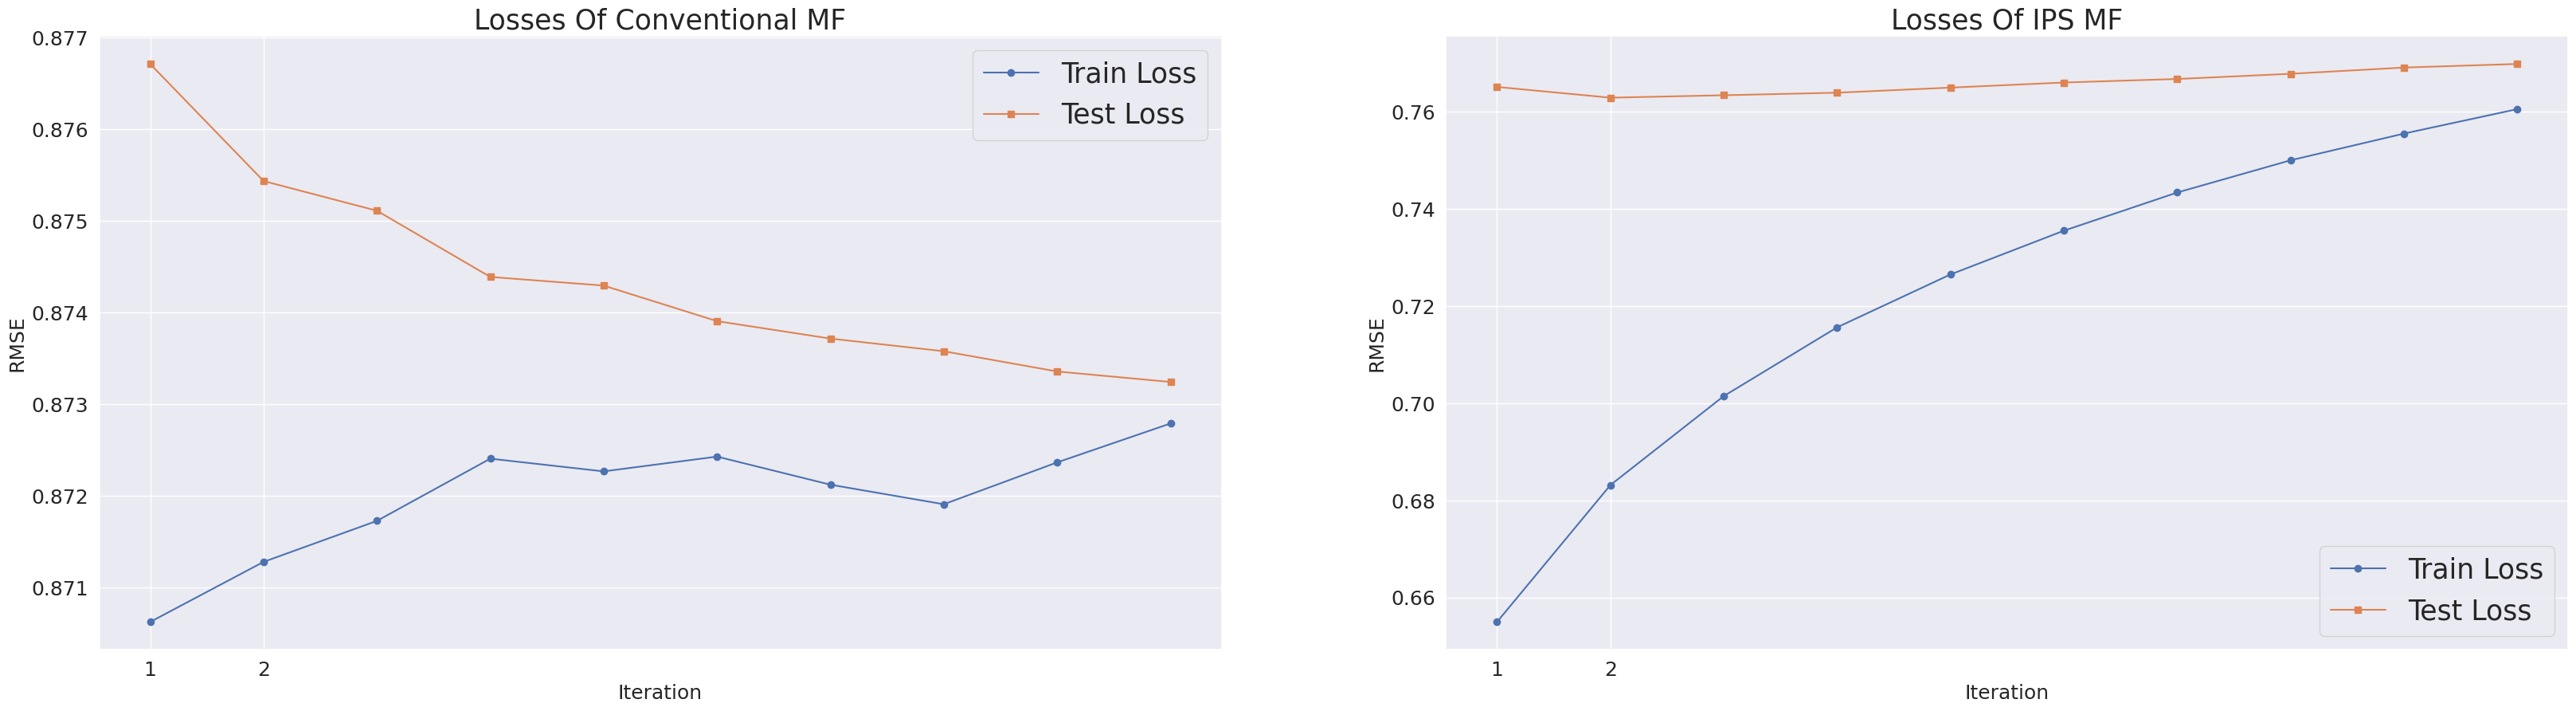

In [20]:
conv_train_losses = df[df["algorithm"]=="conventional_mf"]["train_loss"].values
conv_test_losses = df[df["algorithm"]=="conventional_mf"]["test_loss"].values
ips_train_losses = df[df["algorithm"]=="ips_mf"]["train_loss"].values
ips_test_losses = df[df["algorithm"]=="ips_mf"]["test_loss"].values

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(40, 10))

axes[0].plot(conv_train_losses, label='Train Loss', marker='o')
axes[0].plot(conv_test_losses, label="Test Loss", marker="s")
axes[0].legend(fontsize=25)
axes[0].set_xlabel('Iteration', fontsize=18)
axes[0].set_ylabel('RMSE', fontsize=18)
axes[0].set_title('Losses Of Conventional MF', fontsize=25)
axes[0].set_xticks(range(0, 2))
axes[0].set_xticklabels([str(i+1) for i in range(0,2)], fontsize=18)
axes[0].tick_params(axis='y', labelsize=18)

axes[1].plot(ips_train_losses, label='Train Loss', marker='o')
axes[1].plot(ips_test_losses, label="Test Loss", marker="s")
axes[1].legend(fontsize=25)
axes[1].set_xlabel('Iteration', fontsize=18)
axes[1].set_ylabel('RMSE', fontsize=18)
axes[1].set_title('Losses Of IPS MF', fontsize=25)
axes[1].set_xticks(range(0, 2))
axes[1].set_xticklabels([str(i+1) for i in range(0,2)], fontsize=18)
axes[1].tick_params(axis='y', labelsize=18)

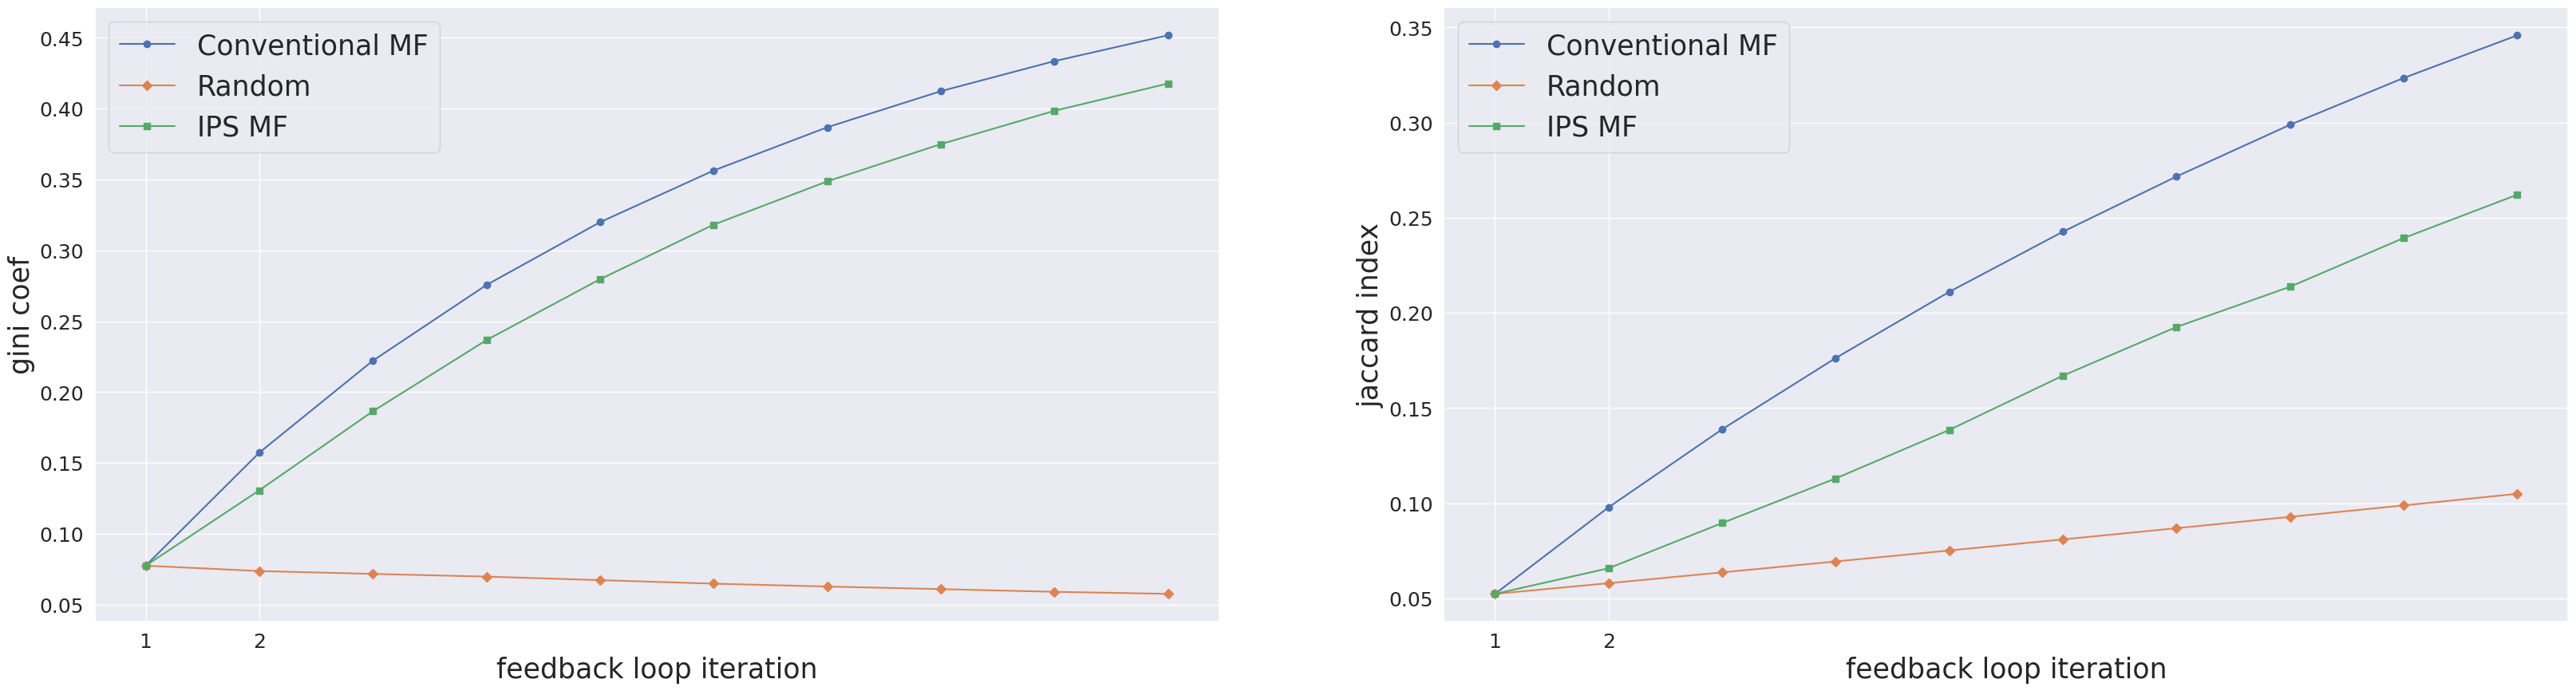

In [21]:
random_ginis = df[df["algorithm"]=="random"]["gini_coef"].values
conv_ginis = df[df["algorithm"]=="conventional_mf"]["gini_coef"].values
ips_ginis = df[df["algorithm"]=="ips_mf"]["gini_coef"].values
random_jaccards = df[df["algorithm"]=="random"]["jaccard_index"].values
conv_jaccards = df[df["algorithm"]=="conventional_mf"]["jaccard_index"].values
ips_jaccards = df[df["algorithm"]=="ips_mf"]["jaccard_index"].values


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(40, 10))


axes[0].plot(conv_ginis, label='Conventional MF', marker='o')
axes[0].plot(random_ginis, label='Random', marker='D')
axes[0].plot(ips_ginis, label="IPS MF", marker="s")
axes[0].legend(fontsize=25)
axes[0].set_xlabel('feedback loop iteration', fontsize=25)
axes[0].set_ylabel('gini coef', fontsize=25)
axes[0].set_xticks(range(0, 2))
axes[0].set_xticklabels([str(i+1) for i in range(0,2)], fontsize=18)
axes[0].tick_params(axis='y', labelsize=18)

axes[1].plot(conv_jaccards, label='Conventional MF', marker='o')
axes[1].plot(random_jaccards, label='Random', marker='D')
axes[1].plot(ips_jaccards, label="IPS MF", marker="s")
axes[1].legend(fontsize=25)
axes[1].set_xlabel('feedback loop iteration', fontsize=25)
axes[1].set_ylabel('jaccard index', fontsize=25)
axes[1].set_xticks(range(0, 2))
axes[1].set_xticklabels([str(i+1) for i in range(0,2)], fontsize=18)
axes[1].tick_params(axis='y', labelsize=18)

plt.show()

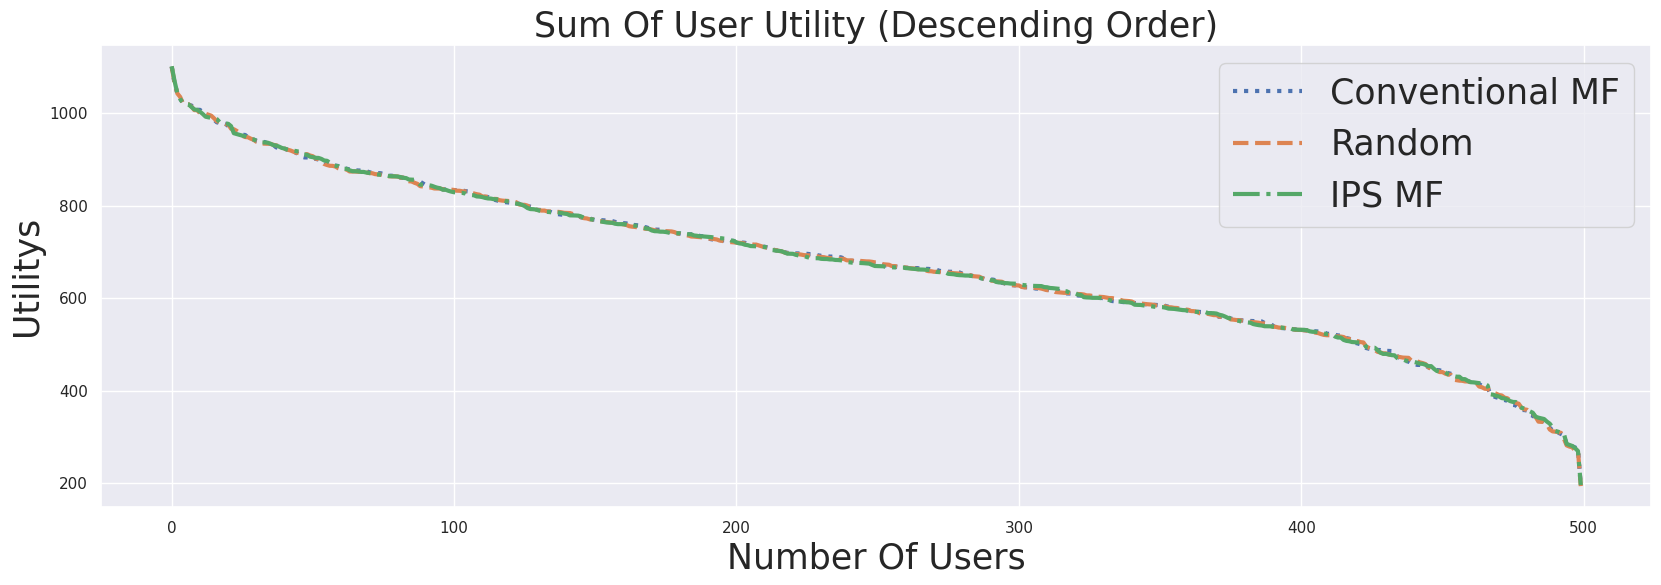

In [22]:
user_utils_conv = np.sort(np.nansum(conv_matrix, axis=1))[::-1] 
user_utils_random = np.sort(np.nansum(random_matrix, axis=1))[::-1] 
user_utils_ips = np.sort(np.nansum(ips_matrix, axis=1))[::-1] 
users = [u for u in range(random_matrix.shape[0])]

plt.figure(figsize=(20,6))
plt.plot(users, user_utils_conv, linewidth=3, label='Conventional MF', linestyle="dotted")
plt.plot(users, user_utils_random, label="Random", linewidth=3, linestyle="dashed")
plt.plot(users, user_utils_ips, label="IPS MF", linewidth=3, linestyle="dashdot")
plt.title('Sum Of User Utility (Descending Order)', fontdict=dict(size=25))
plt.xlabel("Number Of Users", fontdict=dict(size=25))
plt.ylabel("Utilitys", fontdict=dict(size=25))
plt.legend(fontsize=25)


plt.show()


In [23]:
# フィードバックループイテレーションごとにユーザとアイテムの効用を出したほうが、バイアスの増幅がわかりやすい？？

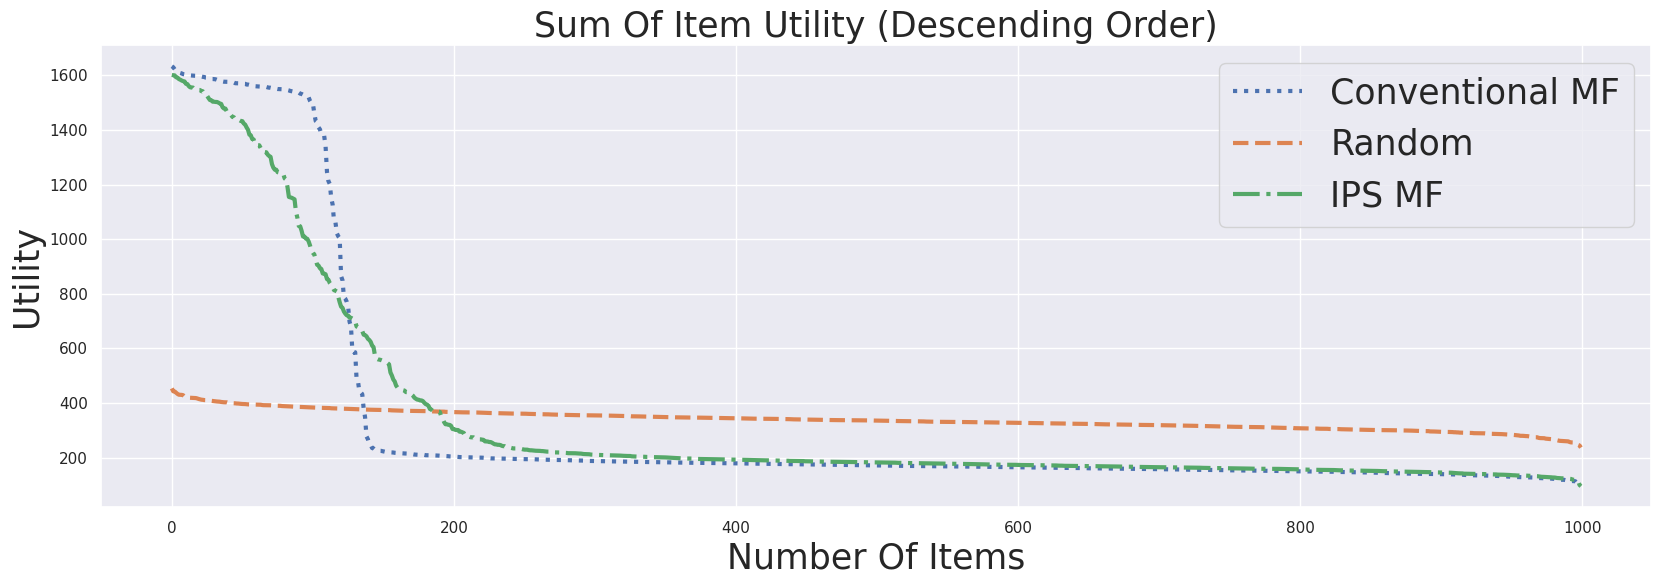

In [24]:
item_utils_conv = np.sort(np.nansum(conv_matrix, axis=0))[::-1] 
item_utils_random = np.sort(np.nansum(random_matrix, axis=0))[::-1] 
item_utils_ips = np.sort(np.nansum(ips_matrix, axis=0))[::-1] 
items = [u for u in range(random_matrix.shape[1])]

plt.figure(figsize=(20,6))
plt.plot(items, item_utils_conv, linewidth=3, label='Conventional MF', linestyle="dotted")
plt.plot(items, item_utils_random, label="Random", linewidth=3, linestyle="dashed")
plt.plot(items, item_utils_ips, label="IPS MF", linewidth=3, linestyle="dashdot")
plt.title('Sum Of Item Utility (Descending Order)', fontdict=dict(size=25))
plt.xlabel("Number Of Items", fontdict=dict(size=25))
plt.ylabel("Utility", fontdict=dict(size=25))
plt.legend(fontsize=25)

plt.show()